In [2]:
# remove "MRMR" from both includes to load all subjects
! aws s3 sync --exclude "*" --include "MRMR*.bam" --include "MRMR*.bam.bai" s3://gist-prod/media/subjects/ /mnt/vep/subjects/


[Errno 13] Permission denied: '/mnt/vep/subjects/'


In [22]:
! find /mnt/vep/subjects/ -name "*.bam*"

/mnt/vep/subjects/MRMR-0011-266B/MRMR-0011-266B.bam
/mnt/vep/subjects/MRMR-0011-266B/MRMR-0011-266B.bam.bai
/mnt/vep/subjects/MRMR-0080-829K/MRMR-0080-829K.bam.bai
/mnt/vep/subjects/MRMR-0080-829K/MRMR-0080-829K.bam
/mnt/vep/subjects/MRMR-0040-6444/MRMR-0040-6444.bam.bai
/mnt/vep/subjects/MRMR-0040-6444/MRMR-0040-6444.bam
/mnt/vep/subjects/MRMR-0080-518T/MRMR-0080-518T.bam
/mnt/vep/subjects/MRMR-0080-518T/MRMR-0080-518T.bam.bai
/mnt/vep/subjects/MRMR-0052-1169/MRMR-0052-1169.bam
/mnt/vep/subjects/MRMR-0052-1169/MRMR-0052-1169.bam.bai
/mnt/vep/subjects/MRMR-0070-091B/MRMR-0070-091B.bam.bai
/mnt/vep/subjects/MRMR-0070-091B/MRMR-0070-091B.bam
/mnt/vep/subjects/MRMR-0060-231F/MRMR-0060-231F.bam.bai
/mnt/vep/subjects/MRMR-0060-231F/MRMR-0060-231F.bam
/mnt/vep/subjects/MRMR-0081-680Z/MRMR-0081-680Z.bam
/mnt/vep/subjects/MRMR-0081-680Z/MRMR-0081-680Z.bam.bai
/mnt/vep/subjects/MRMR-0076-691T/MRMR-0076-691T.bam
/mnt/vep/subjects/MRMR-0076-691T/MRMR-0076-691T.bam.bai
/mnt/vep/subjects/MRMR-0067-

In [4]:
import pysam, glob, os
import matplotlib.pyplot as plt

In [23]:
subject_bams = {'total': []}
count = 0
for root, dirs, files in os.walk('/mnt/vep/subjects'):
    for file_name in files:
        if file_name.endswith('.bam'):
            file_path = os.path.join(root, file_name)
            subject = os.path.splitext(file_name)[0]
            subject_bams[subject] = []
            bamfile = pysam.AlignmentFile(file_path, "rb")
            for read in bamfile.fetch('X', start=31137345, end=33229636):
                if not read.is_unmapped:
                    mapq = read.mapping_quality
                    if mapq < 20:
                        count += 1
                        if count < 100:
                            print read.reference_start, read.cigarstring, read.query_sequence
                    subject_bams[subject].append(mapq)
                    subject_bams['total'].append(mapq)
            print 'finished adding mapq for {} with {} reads'.format(subject, len(subject_bams[subject]))
            bamfile.close()

31144650 50M101H GTAATACACACATGCGCGTGCACACACACAATTATTACACAAACCCCAAA
31155208 81S70M CCCCCCCTTTTTTTTTTCTAGCAGAAGACCCCCTCCCAGCCACGAGTCCGTCGCGTGGGCTCGCCGATGGGTATAAGAGACAGCTGCAACCTCTGCCTTCCGGGTTCAAGCGATTCGCCTGCCTCAGCCTCCTGAGTGGCTGGGACTACAG
31155210 68M CTGCAACATCTGCCTTCCGGGTTCAAGTGATTCTCCTGCCTCAGCATCCTGAGTGGCTGGGACTACAG
31164497 27S78M46S TCGGTAGAGAGGGAGAAGGTGACCACCCCGTTGTGCCAATCGCGTTGGCCTCTGCGGCGGGCTAATTCATCCTCAAGAAAACAGAATTACTTGTCAGAATAAACAGAGCAAGGAATAGAGGTGCGACTAAGAGACAGACGCGGGACTGAGG
31170927 7H34M108H ATTACAGGTGTGAGCCACTGTTCCCAGCCTAATT
31190523 52S48M51S CATTTGGAGAGATTGTATAATTTATATAATATACATTGGTGTTTTACAATTATGCTAGGCTGATAAAAAAAGTAAAAACTGATTAAAACATATGTGACGTGATATAATAAATTAAATAACAAATAGAAAAATACAGAAAAAAAAAGTTTAA
31196525 39M112H ATTAGTGGCTGTATTGTGTTGTGGTTTTTTTTTTTTTTT
31196532 32M119S GCTGTATTGTGTTGTGGTTTTTTTTTTTTTTTTAAAAAATAAAAAAAAATTAAAAAATTTAAAAAAAAAAAATTAAAATTAAAATAAAAAAATAAAAAATAAAAAAAATAATATATTAAAATTTAAAATTAATTTAAAAAAAAAAAAAATA
31196532 32M119H ACTGTATTGTGTTGTGGTTTTTTTTTTTTTTT
31196549 1

MRMR-0073-177W : 205/23835
MRMR-0081-680Z : 314/32556
MRMR-0076-691T : 211/28857
MRMR-0080-518T : 190/32588
MRMR-0052-358X : 183/40483
MRMR-0067-098S : 178/23475
MRMR-0060-231F : 132/34151
MRMR-0047-446X : 154/32930
MRMR-0052-1169 : 177/39453
MRMR-0011-266B : 183/35989
MRMR-0070-091B : 176/25617
MRMR-0080-829K : 165/27817
MRMR-0040-6444 : 161/31513
total : 2633/442173
MRMR-0060-736V : 204/32909


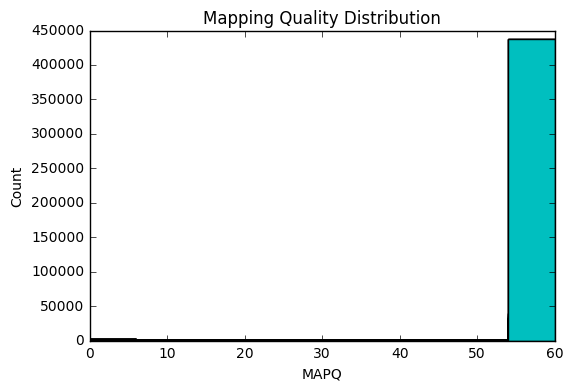

In [20]:
for subject, subject_mapq_distribution in subject_bams.items():
    print '{} : {}/{}'.format(subject, len([item for item in subject_mapq_distribution if item < 30]), len(subject_mapq_distribution))
    plt.hist(subject_mapq_distribution)
    
plt.hist(subject_bams['total'])
# plt.title("Mapping Quality Distribution for {}".format(subject))
plt.title("Mapping Quality Distribution")
plt.xlabel("MAPQ")
plt.ylabel("Count")

plt.gcf()